# ENG2006 Coursework 2

## Instructions

This assignment carries 50\% of the module mark. Completed work should be submitted via eBART by **12 noon on Friday 29/04/2022**.

#### Asnswering the questions

When answering the questions please keep the following in mind:

+ Your submission should consist of the **present notebook and the imageModel folder created in Question 2 only**, any other files will not be taken into consideration.
+ Each question should be answered in the cell directly after its description. **New cells should not be added to the notebook**.
+ Your questions should consist exclusively of code with comments where necessary.
+ **You should not use any `input` commands**.
+ Whenever requested, **you should use the variable names specified in the description**.

#### Testing your answers

This notebook contains some automated tests, which you can run to test your answers before submission. To do this:

+ Once you have completed each question and executed the corresponding cell, execute the cell directly after it:
    - If your answer passes the tests, a message will appear.
    - If not, an error will be trigered. At the very end of the error message, there will be a possible explanation for why the test failed.
+ Once you have completed all questions, select the option Restart & Run All from the Kernel menu to ensure that all tests can still be pased.

If your answers can pass all the tests and your results seem reasonable, your notebook should be ready for submission. However you should keep in mind that:

+ The tests mainly check that the correct variables are created, and only to a limited extent the validity of the results.
+ Passing the tests does not guarantee the correctness of your solution.
+ Additional tests will be performed after submission.
+ As a result, passing the tests for a specific task does not guarantee that you will be awarded all of the corresponding marks.

#### Submitting your coursework

As mentioned above, your coursework for the python part should consist of the present notebook and the imageModel folder to be created in Question 2 only. Once you have answered all of the questions and tested your answers, save the notebook and add it to a .zip file. **Do not include** the `casting_data` folder provided with the notebook.

## Question 1 [50 marks]

<br />
<br />

<div>
<img src="points.png" width="500" align="center">
</div>

The provided `points.txt` and `labels.txt` files contain coordinates and labels for a set of points in the 2D plane, divided in classes as shown above. Follow the steps below to train a neural network to classify these points:

### Question 1-a [5 marks]

Read the points and labels and plot them with different colors for each class. Store the points in a numpy array named `points` and the labels in an array named `pointLabels`.

[[-0.18499166 -0.57554287]
 [ 0.23985533 -0.92359283]
 [-0.05489109 -0.05299839]
 ...
 [-0.42331549  0.63802215]
 [ 0.01330265 -0.82599817]
 [-0.15392103  0.97118776]]
[2. 2. 3. ... 1. 2. 0.]
(4000, 2) (4000,)


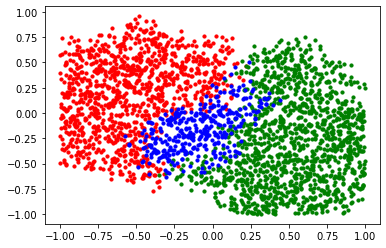

NotImplementedError: 

In [4]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors
from warnings import filterwarnings
filterwarnings(action='ignore')

points1 = pd.read_csv("points.txt", sep=" ")
points = np.loadtxt("points.txt", dtype=float)
print(points)
points.shape

pointLabels1 = pd.read_csv("labels.txt", sep=" ")
pointLabels = np.loadtxt("labels.txt", dtype=float)
print(pointLabels)
pointLabels.shape



print(points.shape, pointLabels.shape)

x=points1.iloc[:,0].values
y=points1.iloc[:,1].values
C=pointLabels1.iloc[:,0].values
x.shape
y.shape
C.shape

def lim(points1, gap):
    low  = min(points1)
    high = max(points1)
    span = high - low

    return low - span*gap/2, high + span*gap/2

colors = [ 'red', 'green', 'blue','cyan']
for i, c in enumerate(colors):
    ind = C == (i+1)
    plt.scatter(x[ind], y[ind], c=c, s=10)
   
plt.show()

raise NotImplementedError()

In [5]:
#Run this cell to test your answer for Question 1-a
from tests import question1a

question1a(points,pointLabels)

points and labels seem to be defined properly


### Question 1-b [5 marks]

Divide the data set into three parts by performing:

+ A 50-50 split of the original data resulting in a test set consisting of 50% of the original points. Store the points and labels for the test set in variables named `pointsTest` and `pointLabelsTest` respectively.
+ A 80-20 split of the remaining data resulting in:
    + A training set consisting of 40% of the original data. Store the points and labels for the training set in variables named `pointsTrain` and `pointLabelsTrain` respectively.
    + A validation set consisting of 10% of the original data. Store the points and labels for the validation set in variables named `pointsVal` and `pointLabelsVal` respectively.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, pointsTest, y_train, pointLabelsTest = train_test_split(points, pointLabels, test_size=0.5)

pointsTrain, pointsVal, pointLabelsTrain, pointLabelsVal = train_test_split(X_train, y_train, test_size=0.2)

raise NotImplementedError()

NotImplementedError: 

In [7]:
#Run this cell to test your answer for Question 1-b
from tests import question1b

question1b(pointsTrain,pointsVal,pointsTest,pointLabelsTrain,pointLabelsVal,pointLabelsTest)

Training validation and test sets seem to be defined properly


### Question 1-c [30 marks]

Using tensorflow, train a feedforward neural network to classify the points using hyperparemeter tuning and early stopping. More specifically, your training code should:

+ Consider networks with 1,2 and 4 hidden layers with ReLU activation.
+ Consider networks with 64, 128, 256 and 512 hidden units in each layer.
+ Train using the Adam optimiser with categorical sparse cross entropy and stop if the loss for the validation set does not improve for more than 5 consecutive iterations.
+ Save the network that achieves the best performance, along with the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units.

The final model created by the above process should be named `modelOpt`. Similarly, the corresponding loss and accuracy for the validation set, number of hidden layers and number of hidden units should be named `lossOpt`, `accOpt`, `layersOpt` and `unitsOpt` respectively.

In [8]:
# YOUR CODE HERE
import tensorflow as tf
from pandas.core.common import flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
hiddenUnits = [512,256,128,64]
for units in hiddenUnits:
    modelOpt = Sequential()
    modelOpt.add(tf.keras.layers.Dense(units, input_dim=len(points[0,:]), activation='relu'))
    modelOpt.add(tf.keras.layers.Dense(units, activation='relu'))
    modelOpt.add(tf.keras.layers.Dense(units, activation='relu'))
    modelOpt.add(tf.keras.layers.Dense(units, activation='relu'))
    modelOpt.add(tf.keras.layers.Dense(1, activation='sigmoid'))
modelOpt.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelOpt.fit(points,pointLabels,epochs=100)
lossOpt, accOpt = modelOpt.evaluate(pointsVal,  pointLabelsVal)

layersOpt=4
unitsOpt=units

from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath='my_model.hdf5', monitor='val_loss',save_best_only='True',save_weights_only='False',save_freq='epoch')
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

raise NotImplementedError()

Epoch 1/100
125/125 [==============================] - 0s 835us/step - loss: 0.0000e+00 - accuracy: 0.2442
Epoch 2/100
125/125 [==============================] - 0s 867us/step - loss: 0.0000e+00 - accuracy: 0.2390
Epoch 3/100
125/125 [==============================] - 0s 830us/step - loss: 0.0000e+00 - accuracy: 0.2335
Epoch 4/100
125/125 [==============================] - 0s 827us/step - loss: 0.0000e+00 - accuracy: 0.2385
Epoch 5/100
125/125 [==============================] - 0s 865us/step - loss: 0.0000e+00 - accuracy: 0.2368
Epoch 6/100
125/125 [==============================] - 0s 857us/step - loss: 0.0000e+00 - accuracy: 0.2385
Epoch 7/100
125/125 [==============================] - 0s 763us/step - loss: 0.0000e+00 - accuracy: 0.2397
Epoch 8/100
125/125 [==============================] - 0s 754us/step - loss: 0.0000e+00 - accuracy: 0.2397
Epoch 9/100
125/125 [==============================] - 0s 733us/step - loss: 0.0000e+00 - accuracy: 0.2397
Epoch 10/100
125/125 [===============

Epoch 77/100
125/125 [==============================] - 0s 759us/step - loss: 0.0000e+00 - accuracy: 0.2455
Epoch 78/100
125/125 [==============================] - 0s 867us/step - loss: 0.0000e+00 - accuracy: 0.2455
Epoch 79/100
125/125 [==============================] - 0s 807us/step - loss: 0.0000e+00 - accuracy: 0.2450
Epoch 80/100
125/125 [==============================] - 0s 828us/step - loss: 0.0000e+00 - accuracy: 0.2450
Epoch 81/100
125/125 [==============================] - 0s 825us/step - loss: 0.0000e+00 - accuracy: 0.2455
Epoch 82/100
125/125 [==============================] - 0s 861us/step - loss: 0.0000e+00 - accuracy: 0.2450
Epoch 83/100
125/125 [==============================] - 0s 755us/step - loss: 0.0000e+00 - accuracy: 0.2450
Epoch 84/100
125/125 [==============================] - 0s 700us/step - loss: 0.0000e+00 - accuracy: 0.2447
Epoch 85/100
125/125 [==============================] - 0s 728us/step - loss: 0.0000e+00 - accuracy: 0.2453
Epoch 86/100
125/125 [======

NotImplementedError: 

In [9]:
#Run this cell to test your answer for Question 1-c
from tests import question1c

question1c(layersOpt,unitsOpt,lossOpt,accOpt,modelOpt,pointsVal,pointLabelsVal)

13/13 [==============================] - 0s 786us/step - loss: 0.0000e+00 - accuracy: 0.2650


AssertionError: The accuracy of your model seems very low. Make sure you have trained it properly.

### Question 1-d [5 marks]

Evaluate the accuracy and loss of the trained model for the test set and store them in variables named `accTest` and `lossTest` respectively. Then, create and plot the confusion matrix for the test set. Store the matrix as well as the corresponding display object in variables named `pointsConfusionMatrix` and `pointsConfusionMatrixPlot` respectively.

In [10]:
# YOUR CODE HERE
y_predict= modelOpt.predict(pointsTest)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

pointsConfusionMatrix=confusion_matrix(pointLabelsTest,y_predict)

classLabels = ['defect','No-defect']

pointsConfusionMatrixPlot = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=classLabels)

#pointsConfusionMatrixPlot.plot()

raise NotImplementedError()

NameError: name 'confusionMatrix' is not defined

In [ ]:
#Run this cell to test your answer for Question 1-d
from tests import question1d

question1d(accTest,accOpt,lossTest,pointsConfusionMatrix,pointsConfusionMatrixPlot)

### Question 1-e [5 marks]

Using the function provided in lecture 2, create a contour plot of the decision boundary for the trained model.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 2 [50 marks]

<br />
<br />

<div>
<img src="components.png" width="600" align="center">
</div>

The accompanying `casting_data` folder contains images of defective and pristine cast components downloaded from [kaggle](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product). The dataset is already split into training and testing parts, stored in the corresponding folders (`train` and `test` respectively). Within each folder, two folders can be found containing images of the defective and pristine components (`def_front` and `ok_front` respectively).

### Question 2-a [5 marks]

Using the function provided in lecture 3, read the files as grayscale images and plot one image from each set. Store the images and the labels in variables named `imagesTrain`, `imageLabelsTrain`,`imagesTest`, `imageLabelsTest` respectively.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-a
from tests import question2a

question2a(imagesTrain,imageLabelsTrain,imagesTest,imageLabelsTest)

### Question 2-b [5 marks]

Normalise all the data and further split the training set into training and validation parts (80-20 split).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-b
from tests import question2b

question2b(imagesTest,imageLabelsTest,imagesTrain,imageLabelsTrain,imagesVal,imageLabelsVal)

### Quesion 2-c[30 marks]

Using tensorflow, train a convolutional neural network to classify the images. The network should:

- Include two convolutional layers with no more than 128 filters, each followed by a max pooling layer.
- Include a number of dense layers and hidden units of your choice.
- Employ early stopping.
- Train within less than 10-15 minutes. Since the exact timing might change in different computers, this requirement is not strict.
- Achieve at least 95% accuracy for the test set. The loss and accuracy obtained for the test set should be stored in variables named `imageAccTest` and `imageLossTest`.

Determining the exact architecture of the network might require some experimentation. Your submission should only include the final architecture chosen, stored in a model named `imageModel`, along with a few comments justifying these choices.

Add your training code in the next cell, without deleting the last line. The last line will save your model such that it can be reused without having to repeat training. The model will be saved in a folder named `imageModel`, which has to be submitted along with the notebook. **Full marks cannot be awarded if this file is missing**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#DO NOT delete the following line, it saves your network once it has been trained so that it can be re-used
imageModel.save('imageModel')

Once your model has successfully trained, you can evaluate its accuracy and loss for the test set in the following cell. Again, do not delete the first three lines of this file since they are necessary for your answer to be properly marked.

In [ ]:
#DO NOT delete the following lines, they load your previously trained model
import tensorflow as tf
imageModel = tf.keras.models.load_model('imageModel')

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Run this cell to test your answer for Question 2-c
from tests import question2c

question2c(imageModel,imageLossTest,imageAccTest,imagesTest,imageLabelsTest)

### Question 2-d [10 marks]

For the first 4 images of the test set, visualise the output of the first 2 filters of each of the convolutional layers.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()